In [1]:
from scipy import special as sy #Integrais Elípticas de Primeira Ordem
import numpy as np
import matplotlib.pyplot as plt

# Strong Field Limit


In [7]:
class point_bh:
    def __init__(self,M):
        self.M=M

#Coeficientes da métrica, usando a métrica de Schwarzschild

    def A(self,r):
        return(1.0-2.0*self.M/r)
    def B(self,r):
        return (self.A(r)**(-1))
    def C(self,r):
        return(r**2)

#Calcula u a partir do Rm

    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)


#Funções das quais dependem o ângulo de deflexão

    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))
    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)
    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))

#O ângulo de deflexão

    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) # Função Elíptica
        return(-np.pi+4.0*np.sqrt(r/s)*F)

# Week Field Limit

In [8]:
class point_mass:
    def __init__(self,M):
        self.M=M

    def defAngle(self,u):
        return(4.0*self.M/u)

# Plotando gráficos e comparando resultados

Será usado $3M_{\odot}$, e para essa mata, considerando a métrica de métrica de Schwarzschild, $R_{s} \approx 9$km

In [9]:
bh=point_bh(3.0)
pm=point_mass(3.0)


r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M #Cria uma listas de distâncias mínimas Rm, dada a massa do bh.
u=bh.u(r)/2.0/bh.M #Calcula o parâmetro de impacto, dado r e M.

a=bh.defAngle(r) #Chama a função do ângulo de deflexão para o Strong Field Limit
b=pm.defAngle(u*2.0*bh.M) #Chama a função do ângulo de deflexão para Week Field Limit

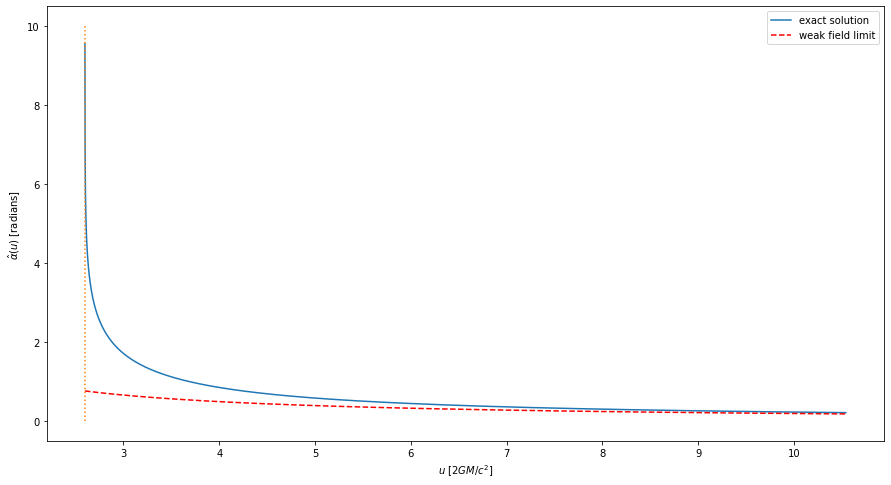

In [10]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
ax.plot(u,a,'-',label='exact solution')
ax.plot(u,b,"--",label='weak field limit',color='red')
ax.set_xlabel(r'$u$ $[2GM/c^2]$')
ax.set_ylabel(r'$\hat\alpha(u)$ [radians]')
ax.legend()

#Plotando a assíntota vertical u = (3*sqrt(3))/2

x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,':')

plt.show()